# Численные методы. Лабораторная работа №9. Косолапов И. ПМ-31

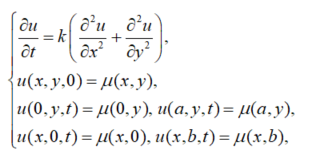

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import pi

In [328]:
def amu(x,y):
    if type(x) == float or type(x) == int:
        x = np.array([x])
    if type(y) == float or type(y) == int:
        y = np.array([y])
    z = np.zeros((len(y), len(x)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[j][i] = -0.01*np.sin(x[i])+0.05*np.sin(y[j])
    return z

In [320]:
amu(meshX,0)

(120, 1)

In [322]:
np.matlib.repmat(amu(meshX,0).T, 1 ,Nt ).shape

(180, 100)

In [321]:
np.matlib.repmat(amu(0,meshY), 1 ,Nt ).shape

(120, 100)

In [109]:
def mu(x,y):
    z = np.zeros((len(y), len(x)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[j][i] = -0.01*np.sin(x[i])+0.05*np.sin(y[j])
    return z

In [110]:
a, b, T, h_x, h_y, tau, k = 6*pi, 4*pi, 10, pi/30, pi/30, 0.1, 0.2

In [162]:
import plotly.graph_objects as go

In [ ]:
import matplotlib.pyplot as plt

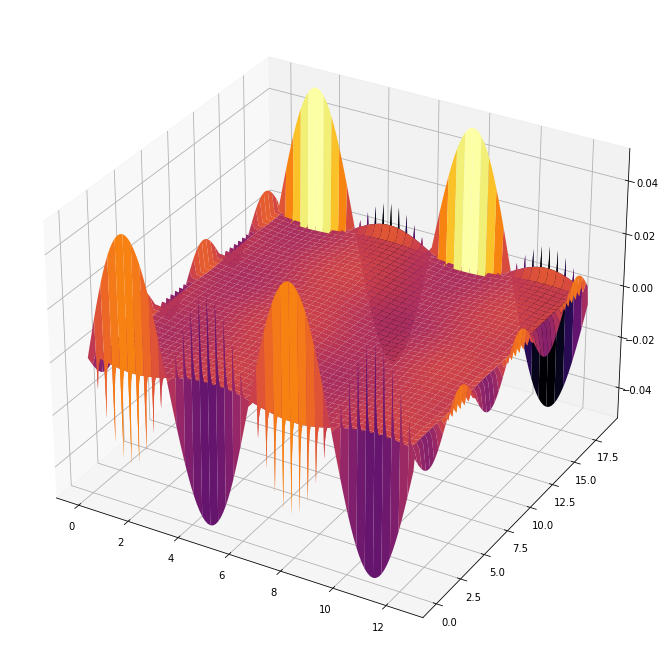

In [355]:

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Y, X,U[:,:,1], cmap='inferno')

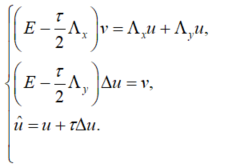

In [117]:
GR_x_0[0,:].reshape(1, 180).shape

(1, 180)

In [245]:
biba = np.array([[1, 2, 3, 4, 5]])

In [258]:
biba.shape

(1, 5)

In [263]:
np.matlib.repmat(biba, 3 , 1).shape

(3, 5)

In [264]:
np.matlib.repmat(biba, 3 , 1)

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [267]:
np.matlib.repmat(GR_x_0[0], 10 , 1).shape

(10, 180)

In [265]:
biba_la_boba = GR_x_0[0]
biba_la_boba.shape

(180,)

In [ ]:
GR_y_0[:,0].reshape(Ny, 1).shape

In [311]:
np.matlib.repmat(GR_y_0[:,0].reshape(Ny, 1), 1 , 2)

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 5.22642316e-03,  5.22642316e-03],
       [ 1.03955845e-02,  1.03955845e-02],
       [ 1.54508497e-02,  1.54508497e-02],
       [ 2.03368322e-02,  2.03368322e-02],
       [ 2.50000000e-02,  2.50000000e-02],
       [ 2.93892626e-02,  2.93892626e-02],
       [ 3.34565303e-02,  3.34565303e-02],
       [ 3.71572413e-02,  3.71572413e-02],
       [ 4.04508497e-02,  4.04508497e-02],
       [ 4.33012702e-02,  4.33012702e-02],
       [ 4.56772729e-02,  4.56772729e-02],
       [ 4.75528258e-02,  4.75528258e-02],
       [ 4.89073800e-02,  4.89073800e-02],
       [ 4.97260948e-02,  4.97260948e-02],
       [ 5.00000000e-02,  5.00000000e-02],
       [ 4.97260948e-02,  4.97260948e-02],
       [ 4.89073800e-02,  4.89073800e-02],
       [ 4.75528258e-02,  4.75528258e-02],
       [ 4.56772729e-02,  4.56772729e-02],
       [ 4.33012702e-02,  4.33012702e-02],
       [ 4.04508497e-02,  4.04508497e-02],
       [ 3.71572413e-02,  3.71572413e-02],
       [ 3.

In [291]:
meshX = np.arange(0, a, h_x)
meshY = np.arange(0, b, h_y)
Nx = len(meshX)
Ny = len(meshY)
meshT = np.arange(0, T, tau)
Nt = len(meshT)
GR_x_0 = mu(meshX,np.zeros(Ny))
GR_y_0 = mu(np.zeros(Nx), meshY)
print(GR_x_0[0,:].shape)
zal = np.matlib.repmat(GR_x_0[0], Nt ,1 ).reshape(180, 100)
print(zal.shape)
U = np.zeros((Ny, Nx, Nt))
U[0,:,:].shape

(180,)
(180, 100)


(180, 100)

In [141]:
np.array([[1, 2, 3], ['a', 'b', 'c']]).reshape(3,2)

array([['1', '2'],
       ['3', 'a'],
       ['b', 'c']], dtype='<U11')

In [389]:
def factorization(a, b, T, h_x, h_y, tau, k):
    meshX = np.arange(0, a, h_x)
    meshY = np.arange(0, b, h_y)
    meshT = np.arange(0, T, tau)
    
    Nx = len(meshX)
    Ny = len(meshY)
    Nt = len(meshT)
    
    U = np.zeros((Ny, Nx, Nt))
    print(f'Nx = {Nx} Ny= {Ny} Nt = {Nt}')
    
    #Начальные и граничные условия
    NY = mu(meshX, meshY)
    GR_x_0 = mu(meshX,np.zeros(Ny))
    GR_y_0 = mu(np.zeros(Nx), meshY)
    GR_x_b = mu(meshX,np.zeros(Ny)+b)
    GR_y_a = mu(np.zeros(Nx)+a, meshY)
    
    print(U.shape)
    U[:,:,0] = NY
    #print(GR_x_0[0].shape)
    U[0,:,:] = np.matlib.repmat(GR_x_0[0].reshape(Nx, 1), 1 ,Nt )
    U[-1,:,:] = np.matlib.repmat(GR_x_b[0].reshape(Nx, 1), 1 ,Nt )
    U[:,0,:] = np.matlib.repmat(GR_y_0[:,0].reshape(Ny, 1), 1 ,Nt )
    U[:,-1,:] = np.matlib.repmat(GR_y_a[:,0].reshape(Ny, 1), 1 ,Nt )
    #Дифференциальные операторы
    b0 = np.zeros(Nx) - 2
    b1 = np.zeros(Nx-1) + 1
    
    LambX = k/(h_x**2)*(np.diag(b0) + np.diag(b1, k = 1) + np.diag(b1, k = -1))
    LambX[0] = 0
    LambX[-1] = 0
    
    b0 = np.zeros(Ny) - 2
    b1 = np.zeros(Ny-1) + 1
    LambY = k/(h_y**2)*(np.diag(b0) + np.diag(b1, k = 1) + np.diag(b1, k = -1))
    LambY[0] = 0
    LambY[-1] = 0
    
    Px = np.eye(Nx) - tau/2 * LambX
    Py = np.eye(Ny) - tau/2 * LambY
    
    Px_inv = np.linalg.inv(Px)
    for i in tqdm(range(Nt-1)):
        v = (U[:,:,i]@LambX + LambY@U[:,:,i]) @ Px_inv
        #print(v.shape, Px.shape)
        delta_u = np.linalg.solve(Py, v)
        U[1:-2, 1:-2, i+1] = U[1:-2, 1:-2, i+1] + tau*delta_u[1:-2, 1:-2]
    return U

In [382]:
meshX = np.arange(0, a, h_x)
meshY = np.arange(0, b, h_y)
meshT = np.arange(0, T, tau)
U = factorization(a, b, T, h_x, h_y, tau, k)

Nx = 180 Ny= 120 Nt = 100
(120, 180, 100)


100%|██████████| 99/99 [00:01<00:00, 85.57it/s]


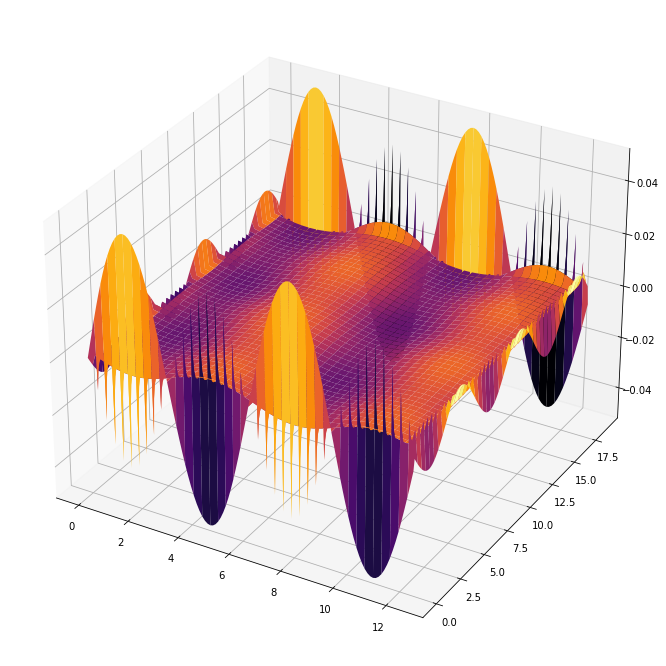

In [372]:
X, Y = np.meshgrid(meshX, meshY)
fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Y, X,U[:,:,1], cmap='inferno')

In [42]:
np.matlib.repmat(np.array([[0, 1,2], [3,4, 5]]), 1 ,3 )

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5]])

In [74]:
type(1) == int

True

In [381]:
def factorization(a, b, T, h_x, h_y, tau, k):
    meshX = np.arange(0, a, h_x)
    meshY = np.arange(0, b, h_y)
    meshT = np.arange(0, T, tau)
    
    Nx = len(meshX)
    Ny = len(meshY)
    Nt = len(meshT)
    
    U = np.zeros((Ny, Nx, Nt))
    print(f'Nx = {Nx} Ny= {Ny} Nt = {Nt}')
    
    #Начальные и граничные условия
    NY = mu(meshX, meshY)
    GR_x_0 = amu(meshX,0)
    GR_y_0 = amu(0, meshY)
    GR_x_b = amu(meshX,b)
    GR_y_a = amu(a, meshY)
    
    print(U.shape)
    U[:,:,0] = NY
    #print(GR_x_0[0].shape)
    U[0,:,:] = np.matlib.repmat(GR_x_0.T, 1 ,Nt )
    U[-1,:,:] = np.matlib.repmat(GR_x_b.T, 1 ,Nt )
    U[:,0,:] = np.matlib.repmat(GR_y_0, 1 ,Nt )
    U[:,-1,:] = np.matlib.repmat(GR_y_a, 1 ,Nt )
    #Дифференциальные операторы
    b0 = np.zeros(Nx) - 2
    b1 = np.zeros(Nx-1) + 1
    
    LambX = k/(h_x**2)*(np.diag(b0) + np.diag(b1, k = 1) + np.diag(b1, k = -1))
    LambX[0] = 0
    LambX[-1] = 0
    
    b0 = np.zeros(Ny) - 2
    b1 = np.zeros(Ny-1) + 1
    LambY = k/(h_y**2)*(np.diag(b0) + np.diag(b1, k = 1) + np.diag(b1, k = -1))
    LambY[0] = 0
    LambY[-1] = 0
    
    Px = np.eye(Nx) - tau/2 * LambX
    Py = np.eye(Ny) - tau/2 * LambY
    
    Px_inv = np.linalg.inv(Px)
    Py_inv = np.linalg.inv(Py)
    for i in tqdm(range(Nt-1)):
        v = (U[:,:,i]@LambX + LambY@U[:,:,i]) 
        nu = np.linalg.solve(Px.T, v.T).T
        delta_u = np.linalg.solve(Py, nu)
        delta_u[0,:] = np.zeros(delta_u[0,:].shape)
        delta_u[-1,:] = np.zeros(delta_u[-1,:].shape)
        delta_u[:,0] = np.zeros(delta_u[:,0].shape)
        delta_u[:,-1] = np.zeros(delta_u[:,-1].shape)
        U[:, :, i+1] = U[:, :, i+1] + tau*delta_u[:, :]
        
        
        #F = np.matrix(u[i])*np.matrix(diff_op_x) + np.matrix(diff_op_y)*np.matrix(u[i])
        #nu = np.linalg.solve(Px.T, F.T).T
        #du = np.linalg.solve(Py, nu)
        #du[0,:] = np.zeros(du[0,:].shape)
        #du[-1,:] = np.zeros(du[-1,:].shape)
        #du[:,0] = np.zeros(du[:,0].shape)
        #du[:,-1] = np.zeros(du[:,-1].shape)
    return U

In [387]:
def factorization(a, b, T, h_x, h_y, tau, k):
    x = np.arange(0, a, h_x)
    y = np.arange(0, b, h_y)
    t = np.arange(0, T, tau)
    u = np.zeros((len(t), len(y), len(x)))
    u[0] = mu(x,y)
    for i in range(1,len(t)):
        u[i,0,:] = np.squeeze(mu(x,[0]))
        u[i,-1,:] = np.squeeze(mu(x,[b]))
        u[i,:,0] = np.squeeze(mu([0],y))
        u[i,:,-1] = np.squeeze(mu([a],y))

    u0 = u
    diff_op_x = np.zeros((len(x),len(x)),dtype= np.float64)
    for n in range(1, len(x)-1):
        diff_op_x[n][n-1] = 1
        diff_op_x[n][n] = -2
        diff_op_x[n][n+1] = 1
    diff_op_x = k/h_x**2 * diff_op_x.T

    diff_op_y = np.zeros((len(y),len(y)),dtype= np.float64)
    for n in range(1, len(y)-1):
        diff_op_y[n][n-1] = 1
        diff_op_y[n][n] = -2
        diff_op_y[n][n+1] = 1
    diff_op_y = k/h_y**2 * diff_op_y

    Px = np.eye(len(x), dtype=np.float64) - tau*diff_op_x/2.0;

    Py = np.eye(len(y), dtype=np.float64) - tau*diff_op_y/2.0;
    
    for i in tqdm(range(Nt-1)):
        v = (U[:,:,i]@diff_op_x + diff_op_y@U[:,:,i]) 
        nu = np.linalg.solve(Px.T, v.T).T
        delta_u = np.linalg.solve(Py, nu)
        delta_u[0,:] = np.zeros(delta_u[0,:].shape)
        delta_u[-1,:] = np.zeros(delta_u[-1,:].shape)
        delta_u[:,0] = np.zeros(delta_u[:,0].shape)
        delta_u[:,-1] = np.zeros(delta_u[:,-1].shape)
        U[:, :, i+1] = U[:, :, i+1] + tau*delta_u[:, :]
        
        
        #F = np.matrix(u[i])*np.matrix(diff_op_x) + np.matrix(diff_op_y)*np.matrix(u[i])
        #nu = np.linalg.solve(Px.T, F.T).T
        #du = np.linalg.solve(Py, nu)
        #du[0,:] = np.zeros(du[0,:].shape)
        #du[-1,:] = np.zeros(du[-1,:].shape)
        #du[:,0] = np.zeros(du[:,0].shape)
        #du[:,-1] = np.zeros(du[:,-1].shape)
    return U

In [ ]:
u = np.zeros((len(t), len(y), len(x)))
u[0] = mu(x,y)
for i in range(1,len(t)):
    u[i,0,:] = np.squeeze(mu(x,[0]))
    u[i,-1,:] = np.squeeze(mu(x,[b]))
    u[i,:,0] = np.squeeze(mu([0],y))
    u[i,:,-1] = np.squeeze(mu([a],y))

u0 = u
diff_op_x = np.zeros((len(x),len(x)),dtype= np.float64)
for n in range(1, len(x)-1):
    diff_op_x[n][n-1] = 1
    diff_op_x[n][n] = -2
    diff_op_x[n][n+1] = 1
diff_op_x = k/hx**2 * diff_op_x.T

diff_op_y = np.zeros((len(y),len(y)),dtype= np.float64)
for n in range(1, len(y)-1):
    diff_op_y[n][n-1] = 1
    diff_op_y[n][n] = -2
    diff_op_y[n][n+1] = 1
diff_op_y = k/hy**2 * diff_op_y

Px = np.eye(len(x), dtype=np.float64) - tau*diff_op_x/2.0;

Py = np.eye(len(y), dtype=np.float64) - tau*diff_op_y/2.0;

In [385]:
%matplotlib notebook
import numpy as np
import scipy

from scipy import sparse
from scipy.sparse import linalg
from numpy import pi, sin

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation

<IPython.core.display.Javascript object>


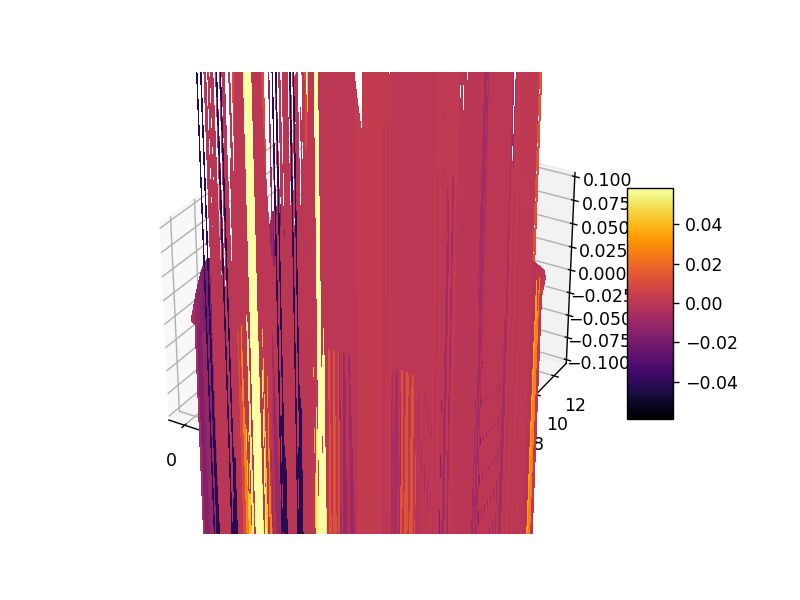

C:\Users\acer\AppData\Local\Temp/ipykernel_4860/269177304.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



Nx = 180 Ny= 120 Nt = 100
(120, 180, 100)


100%|██████████| 99/99 [00:01<00:00, 87.46it/s]


In [390]:
fig = plt.figure()
ax = fig.gca(projection='3d')
U = factorization(a, b, T, h_x, h_y, tau, k)
# Make data.
X, Y = np.meshgrid(meshX, meshY)

# Plot the surface.
surf = ax.plot_surface(Y, X, U[:,:,0], cmap=cm.inferno, linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(-0.1,0.1)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlim(0,a)
ax.set_ylim(0,b)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

def animate(n):
    ax.clear()
    ax.set_zlim(-0.1,0.1)
    surf = ax.plot_surface(X, Y, U[:,:,n], cmap=cm.inferno, linewidth=0, antialiased=False)
    return surf,

anim = animation.FuncAnimation(fig, animate, frames=len(meshT), interval=100, repeat = False)

plt.show()